In [159]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [160]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('../Data-Treated/fixed_data_who_suicide.csv')

# Correcion de formato
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.year

# Utilizar la función unique() para obtener los países únicos y se transorma en un set
paises_unicos = set(df['country'].unique())

# Ordenar el conjunto alfabéticamente
paises_unicos = sorted(paises_unicos)

In [161]:
def linear_regression(df: pd.DataFrame, x:str, y: str, labelx, labely, title)->None:
  model= sm.OLS(df[y],sm.add_constant(df[x])).fit()
  print(model.summary())
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
  y_mean = df[y].mean()
  
  df.plot(x=x, y=y, kind='scatter')
  plt.plot(df[x], [y_mean] * len(df), color='green', label=f'Mean {y}')
  plt.plot(df[x], coef.values[1] * df[x] + coef.values[0], color='red', label='Regression Line')
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.title(title)
  plt.show()

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     7.391
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0100
Time:                        00:11:18   Log-Likelihood:                -455.38
No. Observations:                  38   AIC:                             914.8
Df Residuals:                      36   BIC:                             918.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.036e+06   1.18e+06     -2.582      0.0

C:\Users\rodri\AppData\Local\Temp\ipykernel_15088\2787117396.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']


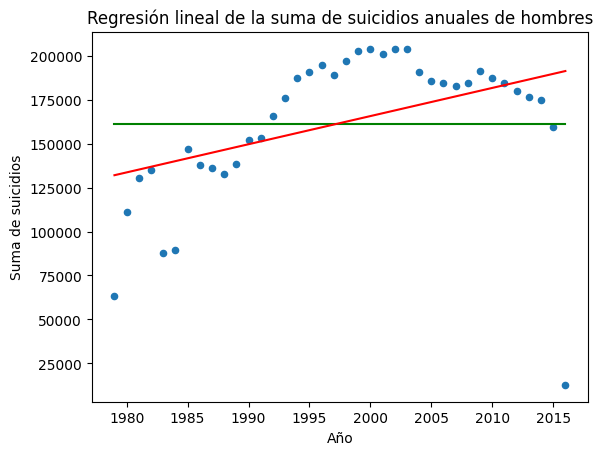

In [162]:
df_by_year = df.groupby(['sex', 'year']).agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
df_by_year = df_by_year[df_by_year['sex'] == 'male']
linear_regression(df_by_year, "year", "suicides_per_year", 
                  "Año", "Suma de suicidios", "Regresión lineal de la suma de suicidios anuales de hombres")

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.011
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.321
Time:                        00:11:19   Log-Likelihood:                -402.79
No. Observations:                  38   AIC:                             809.6
Df Residuals:                      36   BIC:                             812.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.464e+05   2.95e+05     -0.836      0.4

C:\Users\rodri\AppData\Local\Temp\ipykernel_15088\2787117396.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']


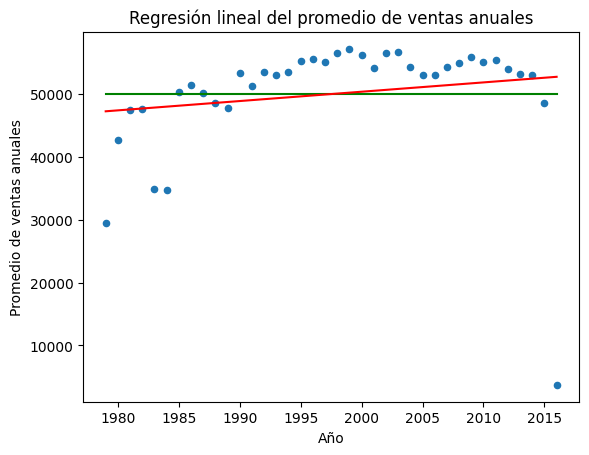

In [163]:
df_by_year = df.groupby(['sex', 'year']).agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
df_by_year = df_by_year[df_by_year['sex'] == 'female']
linear_regression(df_by_year, "year", "suicides_per_year", 
                  "Año", "Promedio de ventas anuales", "Regresión lineal del promedio de ventas anuales")

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.710
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0222
Time:                        00:13:30   Log-Likelihood:                -463.65
No. Observations:                  38   AIC:                             931.3
Df Residuals:                      36   BIC:                             934.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.283e+06   1.46e+06     -2.245      0.0

C:\Users\rodri\AppData\Local\Temp\ipykernel_15088\2787117396.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']


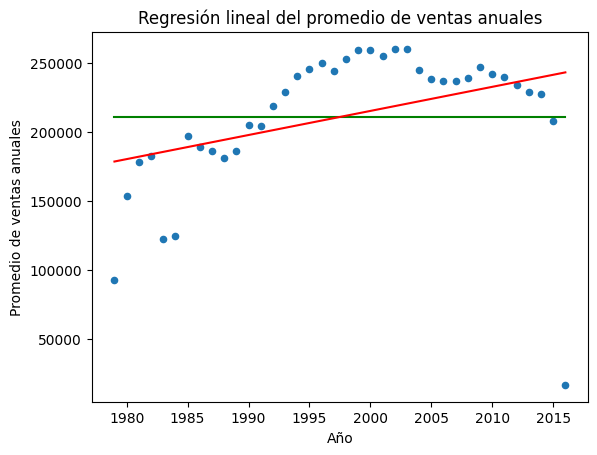

In [170]:
df_by_year = df.groupby('year').agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
linear_regression(df_by_year, "year", "suicides_per_year", 
                  "Año", "Promedio de ventas anuales", "Regresión lineal del promedio de ventas anuales")

                            OLS Regression Results                            
Dep. Variable:     population_by_year   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     25.05
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.48e-05
Time:                        00:11:19   Log-Likelihood:                -792.23
No. Observations:                  38   AIC:                             1588.
Df Residuals:                      36   BIC:                             1592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.998e+10   8.32e+09     -4.804      0.0

C:\Users\rodri\AppData\Local\Temp\ipykernel_15088\2787117396.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']


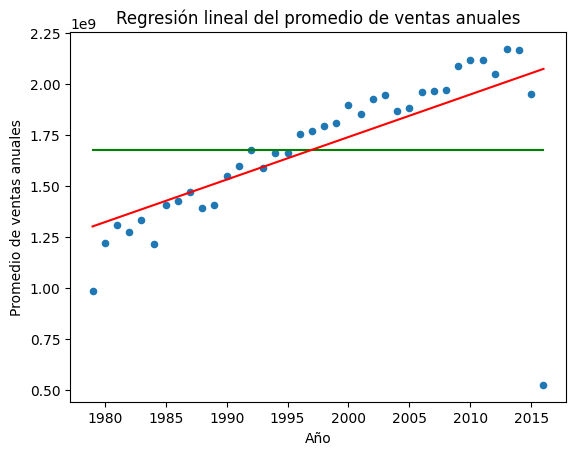

In [165]:
df_by_year = df.groupby('year').agg(population_by_year=('population', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
linear_regression(df_by_year, "year", "population_by_year", 
                  "Año", "Promedio de ventas anuales", "Regresión lineal del promedio de ventas anuales")

In [166]:
def get_rate(df : pd.DataFrame, country: str) -> pd.DataFrame:
    # Se lee el pais especificado en los parametros
    country_data = df[ df['country'] == country]
    display(country_data)

In [167]:
get_rate(df, 'Mexico')

,country,year,sex,init_age,last_age,suicides_no,population
25368,Mexico,1979,female,15,24,121,6670736
25369,Mexico,1979,female,25,34,38,4189516
25370,Mexico,1979,female,35,54,43,4989611
25371,Mexico,1979,female,5,14,9,9613103
25372,Mexico,1979,female,55,74,9,2350236
...,...,...,...,...,...,...,...
25807,Mexico,2015,male,25,34,1195,10243158
25808,Mexico,2015,male,35,54,1560,15181008
25809,Mexico,2015,male,5,14,137,11790898
25810,Mexico,2015,male,55,74,584,6465941


In [168]:
def Calculate_total_deceased_through_years(df: pd.DataFrame, country: str) -> pd.DataFrame:
    headers = ['YEAR','MALE','FEMALE','POPULATION']
    deceased_data = pd.DataFrame(columns=headers)

    # print( 'TOTAL DE REGISTROS:', df[ df['country'] == country].shape[0] )# total de registros

    # Se lee el pais especificado en los parametros
    country_data = df[ df['country'] == country]

    years_set = set(country_data['year'].unique())
    years_set = sorted(years_set)

    for year in years_set:

        # Se enfoca en la data de un unico anio
        year_data = country_data[ country_data['year'] == year ]

        # Se separan los datos de hombres y muejeres
        fem_data = year_data[ year_data['sex'] == 'female']
        male_data = year_data[ year_data['sex'] == 'male']

        # Se suman todas las muertes sin importar el rango de edad
        total_fem_deceased = fem_data['suicides_no'].sum()
        total_male_deceased = male_data['suicides_no'].sum()

        # Se suman todas las poblaciones de los rangos de edad de un anio en especifico
        total_population = year_data['population'].sum()

        # Se agrega una nueva fila al Dataframe con los datos de cada anio
        deceased_data.loc[len(deceased_data.index)] = [year.year, total_male_deceased, total_fem_deceased, total_population]

    # display(deceased_data)

    # country_data.to_csv(f'{country}_total_deceased.csv', index=False)
    deceased_data.to_csv(f'../{country}_total_deceased.csv', index=False)
    return deceased_data

In [169]:
Calculate_total_deceased_through_years(df, 'Albania')

AttributeError: 'numpy.int32' object has no attribute 'year'